In [100]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
fakedata = "Fake.csv.zip"
realdata = "True.csv.zip"

In [102]:
df_fake = pd.read_csv(fakedata)
pd.set_option('display.max_colwidth', None)
df_fake.head(3)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing,"Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and the very dishonest fake news media. The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year, President Angry Pants tweeted. 2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America! Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t even allow him to rise above the gutter long enough to wish the American citizens a happy new year! Bishop Talbert Swan (@TalbertSwan) December 31, 2017no one likes you Calvin (@calvinstowell) December 31, 2017Your impeachment would make 2018 a great year for America, but I ll also accept regaining control of Congress. Miranda Yaver (@mirandayaver) December 31, 2017Do you hear yourself talk? When you have to include that many people that hate you you have to wonder? Why do the they all hate me? Alan Sandoval (@AlanSandoval13) December 31, 2017Who uses the word Haters in a New Years wish?? Marlene (@marlene399) December 31, 2017You can t just say happy new year? Koren pollitt (@Korencarpenter) December 31, 2017Here s Trump s New Year s Eve tweet from 2016.Happy New Year to all, including to my many enemies and those who have fought me and lost so badly they just don t know what to do. Love! Donald J. Trump (@realDonaldTrump) December 31, 2016This is nothing new for Trump. He s been doing this for years.Trump has directed messages to his enemies and haters for New Year s, Easter, Thanksgiving, and the anniversary of 9/11. pic.twitter.com/4FPAe2KypA Daniel Dale (@ddale8) December 31, 2017Trump s holiday tweets are clearly not presidential.How long did he work at Hallmark before becoming President? Steven Goodine (@SGoodine) December 31, 2017He s always been like this . . . the only difference is that in the last few years, his filter has been breaking down. Roy Schulze (@thbthttt) December 31, 2017Who, apart from a teenager uses the term haters? Wendy (@WendyWhistles) December 31, 2017he s a fucking 5 year old Who Knows (@rainyday80) December 31, 2017So, to all the people who voted for this a hole thinking he would change once he got into power, you were wrong! 70-year-old men don t change and now he s a year older.Photo by Andrew Burton/Getty Images.",News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian Collusion Investigation,"House Intelligence Committee Chairman Devin Nunes is going to have a bad day. He s been under the assumption, like many of us, that the Christopher Steele-dossier was what prompted the Russia investigation so he s been lashing out at the Department of Justice and the FBI in order to protect Trump. As it happens, the dossier is not what started the investigation, according to documents obtained by the New York Times.Former Trump campaign adviser George Papadopoulos was drunk in a wine bar when he revealed knowledge of Russian opposition research on Hillary Clinton.On top of that, Papadopoulos wasn t just a covfefe boy for Trump, as his administration has alleged. He had a much larger role, but none so damning as being a drunken fool in a wine bar. Coffee boys don t help to arrange a New York meeting between Trump and President Abdel Fattah el-Sisi of Egypt two months before the election. It was known before th

In [103]:
nan_count_fake = np.sum(df_fake.isnull(), axis = 0)
nan_count_fake

,0
title,0
text,0
subject,0
date,0


In [104]:
df_real= pd.read_csv(realdata)
pd.set_option('display.max_colwidth', None)
df_real.head(3)

title  \
0  As U.S. budget fight looms, Republicans flip their fiscal script   
1  U.S. military to accept transgender recruits on Monday: Pentagon   
2      Senior U.S. Republican senator: 'Let Mr. Mueller do his job'   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [105]:
nan_count_real = np.sum(df_real.isnull(), axis = 0)
nan_count_real

,0
title,0
text,0
subject,0
date,0


### We have no missing values that we have to account for.

In [106]:
realmeanlength = df_real["text"].str.len().mean()
fakemeanlength = df_fake["text"].str.len().mean()
realmeanlength, fakemeanlength

(np.float64(2383.278517065882), np.float64(2547.396235254035))

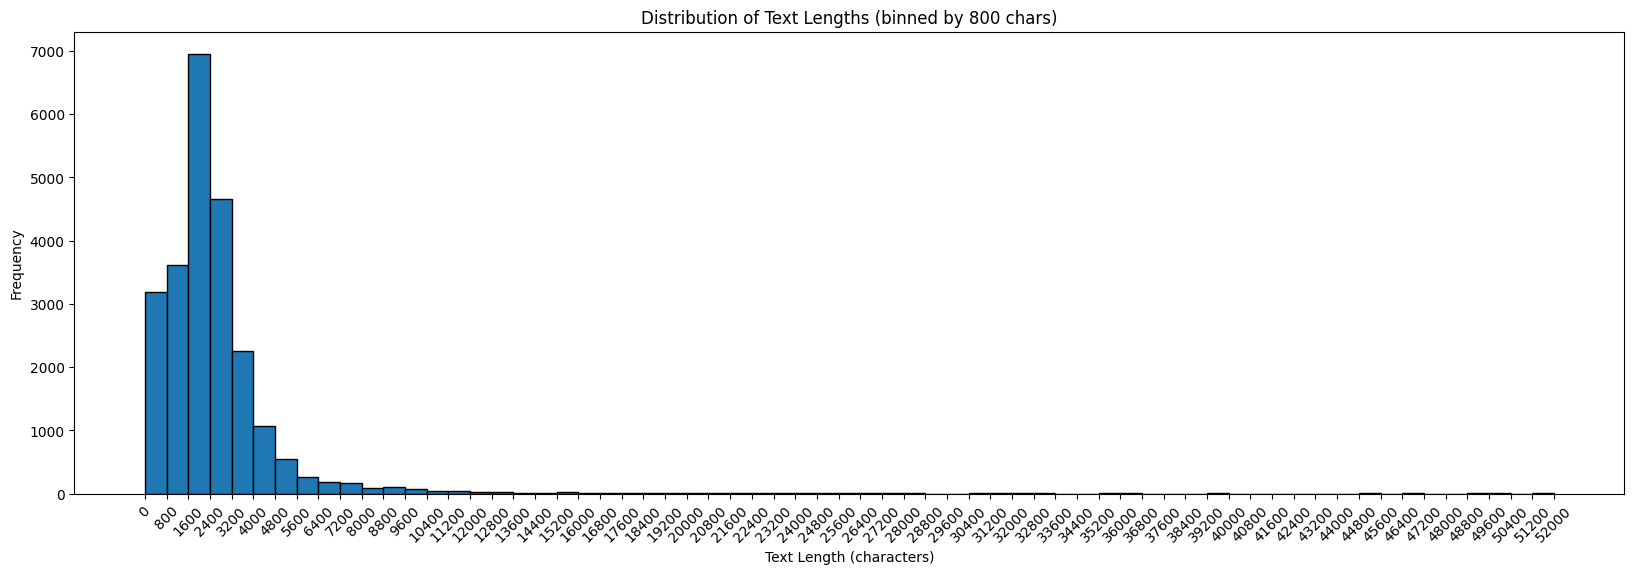

In [107]:
df_fake1 = df_fake.copy()
df_fake1['text_length'] = df_fake1['text'].str.len()
bin_edges = range(0, df_fake1['text_length'].max()+800, 800)
df_fake1["length_bin"] = pd.cut(df_fake1["text_length"], bins=bin_edges)
plt.figure(figsize=(20,6))
plt.hist(df_fake1["text_length"], bins=bin_edges, edgecolor="black")

plt.title("Distribution of Text Lengths (binned by 800 chars)")
plt.xlabel("Text Length (characters)")
plt.ylabel("Frequency")
plt.xticks(bin_edges, rotation=45)
plt.show()

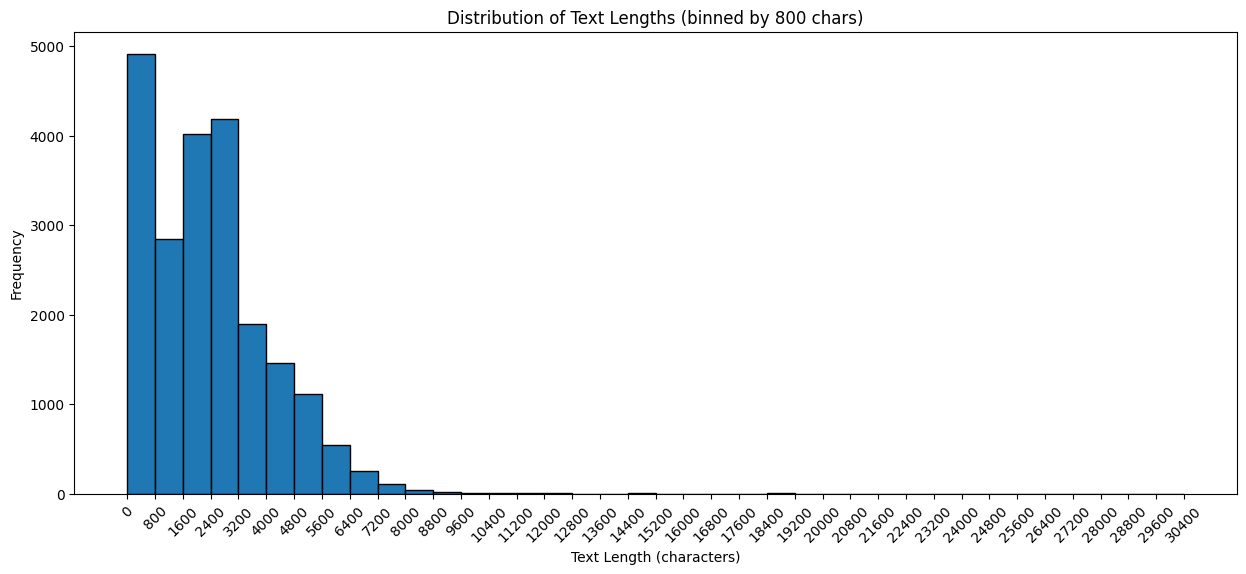

In [108]:
df_real1 = df_real.copy()
df_real1['text_length'] = df_real1['text'].str.len()
bin_edges = range(0, df_real1['text_length'].max()+800, 800)
df_real1["length_bin"] = pd.cut(df_real1["text_length"], bins=bin_edges)
plt.figure(figsize=(15,6))
plt.hist(df_real1["text_length"], bins=bin_edges, edgecolor="black")

plt.title("Distribution of Text Lengths (binned by 800 chars)")
plt.xlabel("Text Length (characters)")
plt.ylabel("Frequency")
plt.xticks(bin_edges, rotation=45)
plt.show()

In [109]:
realmaxlen = df_real["text"].str.len().max()
fakemaxlen = df_fake["text"].str.len().max()
realmaxlen, fakemaxlen

(29781, 51794)

### There does not seem to be that big of a difference between Real and Fake news when it comes to average article length.

#### However, it did seem that those above 30,000 characters all tended to be fake. Exorbitantly long articles may be more prone to carrying false information.

In [110]:
real_subjects = df_real['subject'].value_counts()
fake_subjects = df_fake['subject'].value_counts()
real_subjects

,count
subject,
politicsNews,11272
worldnews,10145


In [111]:
fake_subjects

,count
subject,
News,9050
politics,6841
left-news,4459
Government News,1570
US_News,783
Middle-east,778


### All of the entries are regarding news and politics, but the labels are different. We probably should not use subject as a feature used by the model.

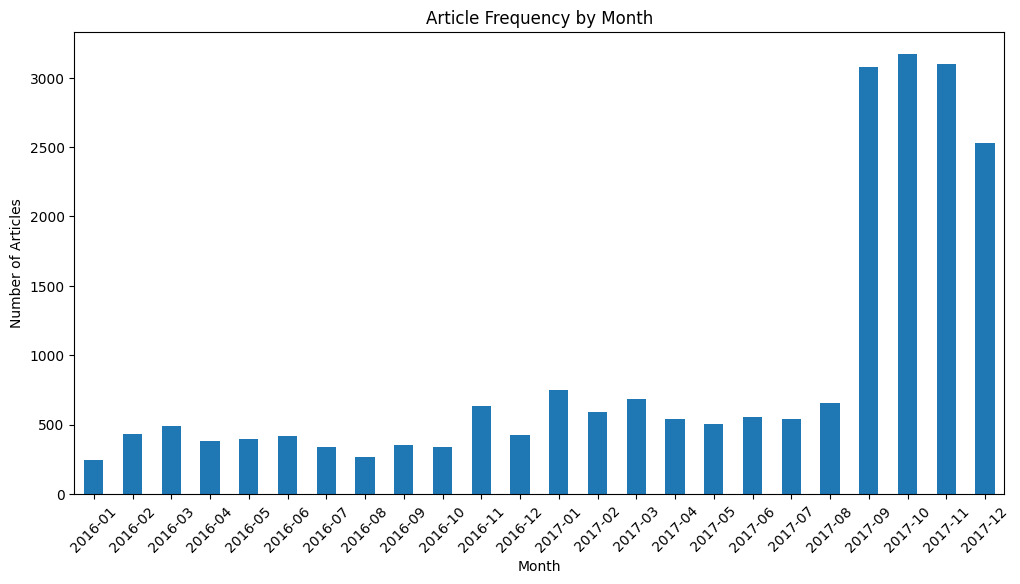

In [112]:
df_real1 = df_real.copy()
df_real1["date"] = pd.to_datetime(df_real1["date"])
# convert date entries to pandas datetime object so that you can order them
date_counts = df_real1["date"].value_counts().sort_index()
monthly_counts = df_real1.groupby(df_real1["date"].dt.to_period("M")).size()
monthly_counts.plot(kind="bar", figsize=(12,6))
plt.xlabel("Month")
plt.ylabel("Number of Articles")
plt.title("Article Frequency by Month")
plt.xticks(rotation=45)
plt.show()

In [113]:
df_fake['date'].value_counts().tail(20)

,count
date,
"December 22, 2017",1
"December 19, 2017",1
"Apr 2, 2015",1
"December 4, 2017",1
https://100percentfedup.com/12-yr-old-black-conservative-whose-video-to-obama-went-viral-do-you-really-love-america-receives-death-threats-from-left/,1
https://100percentfedup.com/video-hillary-asked-about-trump-i-just-want-to-eat-some-pie/,1
"October 9, 2017",1
"Jul 19, 2015",1
"December 11, 2017",1


### Seems to be an uptick in Real articles at the end of 2017 in comparison to prior years. Running into formatting issues with the dates in the Fake dataset. Some entries are not dates at all, while others vary in format (month abbreviations, being written as DD-monthabbreviation-YY, etc).

In [115]:
s = df_fake["date"].astype(str).str.strip()
# remove any leading/trailing whitespace that might be causing issues

s = s.mask(s.str.contains(r"http|www", case=False), other=pd.NA)
s = s.mask(s.str.len() > 35, other=pd.NA)
# replace any "date" values that look like URLs (containing http/www) and any weirdly long entries (>35 characters) with NA

parsed = pd.to_datetime(s, errors = "coerce", dayfirst=False, infer_datetime_format=True)
# convert the strings in 's' to datetime objects
# errors = "coerce" --> invalid dates become NaT instead of error
# dayfirst = False  --> interpret ambiguous formats as month/day/year
# infer_datetime_format = True --> let pandas guess formats for flexibility/speed

mask = parsed.isna() & s.notna()
if mask.any():
    for fmt in ("%d-%b-%y", "%d-%b-%Y", "%b %d, %Y", "%B %d, %Y", "%d/%b/%Y"):
        parsed.loc[mask] = pd.to_datetime(s[mask], format=fmt, errors="coerce")
        mask = parsed.isna() & s.notna()
        if not mask.any():
            break
# handles any strings that were not parsed in the first pass but the original string is not missing
# loops over several specific date format strings to try parsing
# for the current format, attempt to re-parse only the rows flagged by the mask; if parsing fails again, keep them as NaT
# update the mask so it now reflects only rows still unparsed after this attempt
# if the mask is empty (meaning all remaining rows were parsed successfully), break the loop early

df_clean = df_fake.copy()
df_clean["date_parsed"] = parsed
df_clean = df_clean.dropna(subset=["date_parsed"]).copy()
df_clean["date"] = df_clean["date_parsed"].dt.strftime("%B %d, %Y")
df_clean = df_clean.drop(columns=["date_parsed"])
df_clean.head(5)

/tmp/ipython-input-1131400100.py:8: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  parsed = pd.to_datetime(s, errors = "coerce", dayfirst=False, infer_datetime_format=True)


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing,"Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and the very dishonest fake news media. The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year, President Angry Pants tweeted. 2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America! Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t even allow him to rise above the gutter long enough to wish the American citizens a happy new year! Bishop Talbert Swan (@TalbertSwan) December 31, 2017no one likes you Calvin (@calvinstowell) December 31, 2017Your impeachment would make 2018 a great year for America, but I ll also accept regaining control of Congress. Miranda Yaver (@mirandayaver) December 31, 2017Do you hear yourself talk? When you have to include that many people that hate you you have to wonder? Why do the they all hate me? Alan Sandoval (@AlanSandoval13) December 31, 2017Who uses the word Haters in a New Years wish?? Marlene (@marlene399) December 31, 2017You can t just say happy new year? Koren pollitt (@Korencarpenter) December 31, 2017Here s Trump s New Year s Eve tweet from 2016.Happy New Year to all, including to my many enemies and those who have fought me and lost so badly they just don t know what to do. Love! Donald J. Trump (@realDonaldTrump) December 31, 2016This is nothing new for Trump. He s been doing this for years.Trump has directed messages to his enemies and haters for New Year s, Easter, Thanksgiving, and the anniversary of 9/11. pic.twitter.com/4FPAe2KypA Daniel Dale (@ddale8) December 31, 2017Trump s holiday tweets are clearly not presidential.How long did he work at Hallmark before becoming President? Steven Goodine (@SGoodine) December 31, 2017He s always been like this . . . the only difference is that in the last few years, his filter has been breaking down. Roy Schulze (@thbthttt) December 31, 2017Who, apart from a teenager uses the term haters? Wendy (@WendyWhistles) December 31, 2017he s a fucking 5 year old Who Knows (@rainyday80) December 31, 2017So, to all the people who voted for this a hole thinking he would change once he got into power, you were wrong! 70-year-old men don t change and now he s a year older.Photo by Andrew Burton/Getty Images.",News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian Collusion Investigation,"House Intelligence Committee Chairman Devin Nunes is going to have a bad day. He s been under the assumption, like many of us, that the Christopher Steele-dossier was what prompted the Russia investigation so he s been lashing out at the Department of Justice and the FBI in order to protect Trump. As it happens, the dossier is not what started the investigation, according to documents obtained by the New York Times.Former Trump campaign adviser George Papadopoulos was drunk in a wine bar when he revealed knowledge of Russian opposition research on Hillary Clinton.On top of that, Papadopoulos wasn t just a covfefe boy for Trump, as his administration has alleged. He had a much larger role, but none so damning as being a drunken fool in a wine bar. Coffee boys don t help to arrange a New York meeting between Trump and President Abdel Fattah el-Sisi of Egypt two months before the election. It was known before th

In [116]:
df_clean.shape, df_fake.shape

((23471, 4), (23481, 4))

#### Only 10 rows were dropped, so we did not lose too many data points.

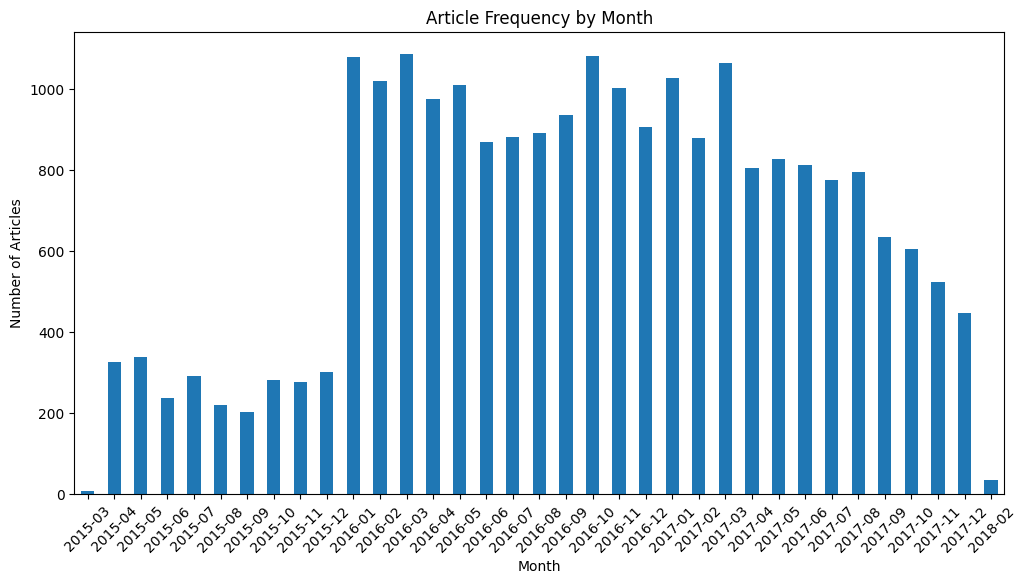

In [117]:
df_clean["date"] = pd.to_datetime(df_clean["date"])
# convert date entries to pandas datetime object so that you can order them
date_counts = df_clean["date"].value_counts().sort_index()
monthly_counts = df_clean.groupby(df_clean["date"].dt.to_period("M")).size()
monthly_counts.plot(kind="bar", figsize=(12,6))
plt.xlabel("Month")
plt.ylabel("Number of Articles")
plt.title("Article Frequency by Month")
plt.xticks(rotation=45)
plt.show()

#### Looks like the Fake articles span into 2018 and are more evenly distributed throughout 2016 and 2017 than the True articles.

In [118]:
df_real_labeled = df_real.copy()
df_real_labeled["category"] = "Real"

In [119]:
df_fake_labeled = df_fake.copy()
df_fake_labeled["category"] = "Fake"

In [120]:
df_realfake = pd.concat([df_fake_labeled, df_real_labeled], ignore_index=True)
df_realfake = df_realfake.sample(frac=1, random_state = 1).reset_index(drop=True)
df_realfake.head(10)

title  \
0                         Trump Calls For This Racist Policy To Be Forced On Every State   
1                            Republican ex-defense secretary Cohen backs Hillary Clinton   
2  TEACHER QUITS JOB After 5th, 6th Grade Muslim Students Threaten To Behead Her [VIDEO]   
3             LAURA INGRAHAM RIPS INTO THE PRESS…Crowd Goes Wild: “Do your job!” [VIDEO]   
4                    Germany's Merkel suffers state vote setback as coalition talks loom   
5            WHOA! MELANIA TRUMP BREAKS HER SILENCE…Fires Back At Trump Accusers [VIDEO]   
6            Study Shows Democrats Are Better Drivers For This SHOCKING Reason (DETAILS)   
7                           U.S. lawmakers want moratorium on commercial flights to Cuba   
8                                     The new risk for Europe: an inward-looking Germany   
9                                 Trump still standing, but damaged by Comey's testimony   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

Created a single combined DataFrame (contains all entries of both tables) and shuffled the entries randomly. Created and kept a column labeling the articles as Fake/True so we can conduct supervised learning.